Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = ""
COLLABORATORS = ""

---

# Интерполяция при помощи полиномов Лагранжа.

In [2]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        L = 0
        if  len(self.xk)!= len(self.yk):
            return 1
        for i in range(len(self.xk)):
            term = 1
            for j in range(len(self.xk)):
                if j != i:
                    term = term * (x - self.xk[j]) / (self.xk[i]- self.xk[j])
            L += term * self.yk[i]
        return L


In [3]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


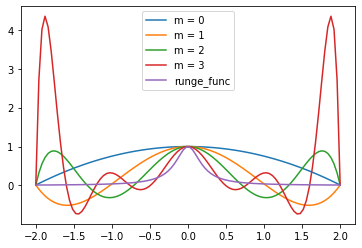

In [4]:
x_list = []
y_list = []
for m in [3, 5, 7, 11]:
    x_list.append(np.linspace(-2,2,m))
    y_list.append(runge_func(np.linspace(-2,2,m)))
    

import matplotlib.pyplot as plt 
x=np.linspace(-2,2,100)
for i in range(len(x_list)):
    lagr = LagrangeInterpolator(x_list[i], y_list[i])
    plt.plot(x, lagr(x), label=f"m = {i}")
plt.plot(x, 1/(1+25*x**2), label='runge_func')
plt.legend()

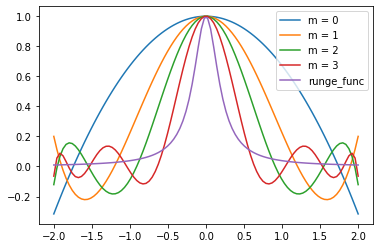

In [5]:
a = -2
b = 2
x = (a+b)/2 + (b-a)/2
lst_x=[]
lst_y = []
x_list=[]
y_list=[]
from math import pi, cos
for m in [3, 5, 7, 11]:
    for i in range(m):
        tmp = 1/2*(a+b) + 1/2*(b-a)*cos(pi*(2*i+1)/(2*m))
        lst_x.append(tmp)
        lst_y.append(runge_func(tmp))
    x_list.append(lst_x)
    y_list.append(lst_y)
    lst_x = []
    lst_y = []
    
x=np.linspace(-2,2,100)
for i in range(len(x_list)):
    lagr = LagrangeInterpolator(x_list[i], y_list[i])
    plt.plot(x, lagr(x), label=f"m = {i}")
plt.plot(x, 1/(1+25*x**2), label='runge_func')
plt.legend()
